In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv("C:\\ksr\\data science\\DS_batch1\\datasets\\Boston.csv")

In [3]:
dataset.shape

(506, 14)

In [5]:
dataset.describe(include='all').T

count        mean         std        min         25%        50%  \
crim     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
zn       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
indus    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
chas     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
nox      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
rm       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
age      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
dis      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
rad      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
tax      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
ptratio  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
black    506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
lstat    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
medv     506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
crim       3.677082   88.9762  
zn        12.500000  100.0000  
indus     18.100000   27.7400  
chas       0.000000    1.0000  
nox        0.624000    0.8710  
rm         6.623500    8.7800  
age       94.075000  100.0000  
dis        5.188425   12.1265  
rad       24.000000   24.0000  
tax      666.000000  711.0000  
ptratio   20.200000   22.0000  
black    396.225000  396.9000  
lstat     16.955000   37.9700  
medv      25.000000   50.0000

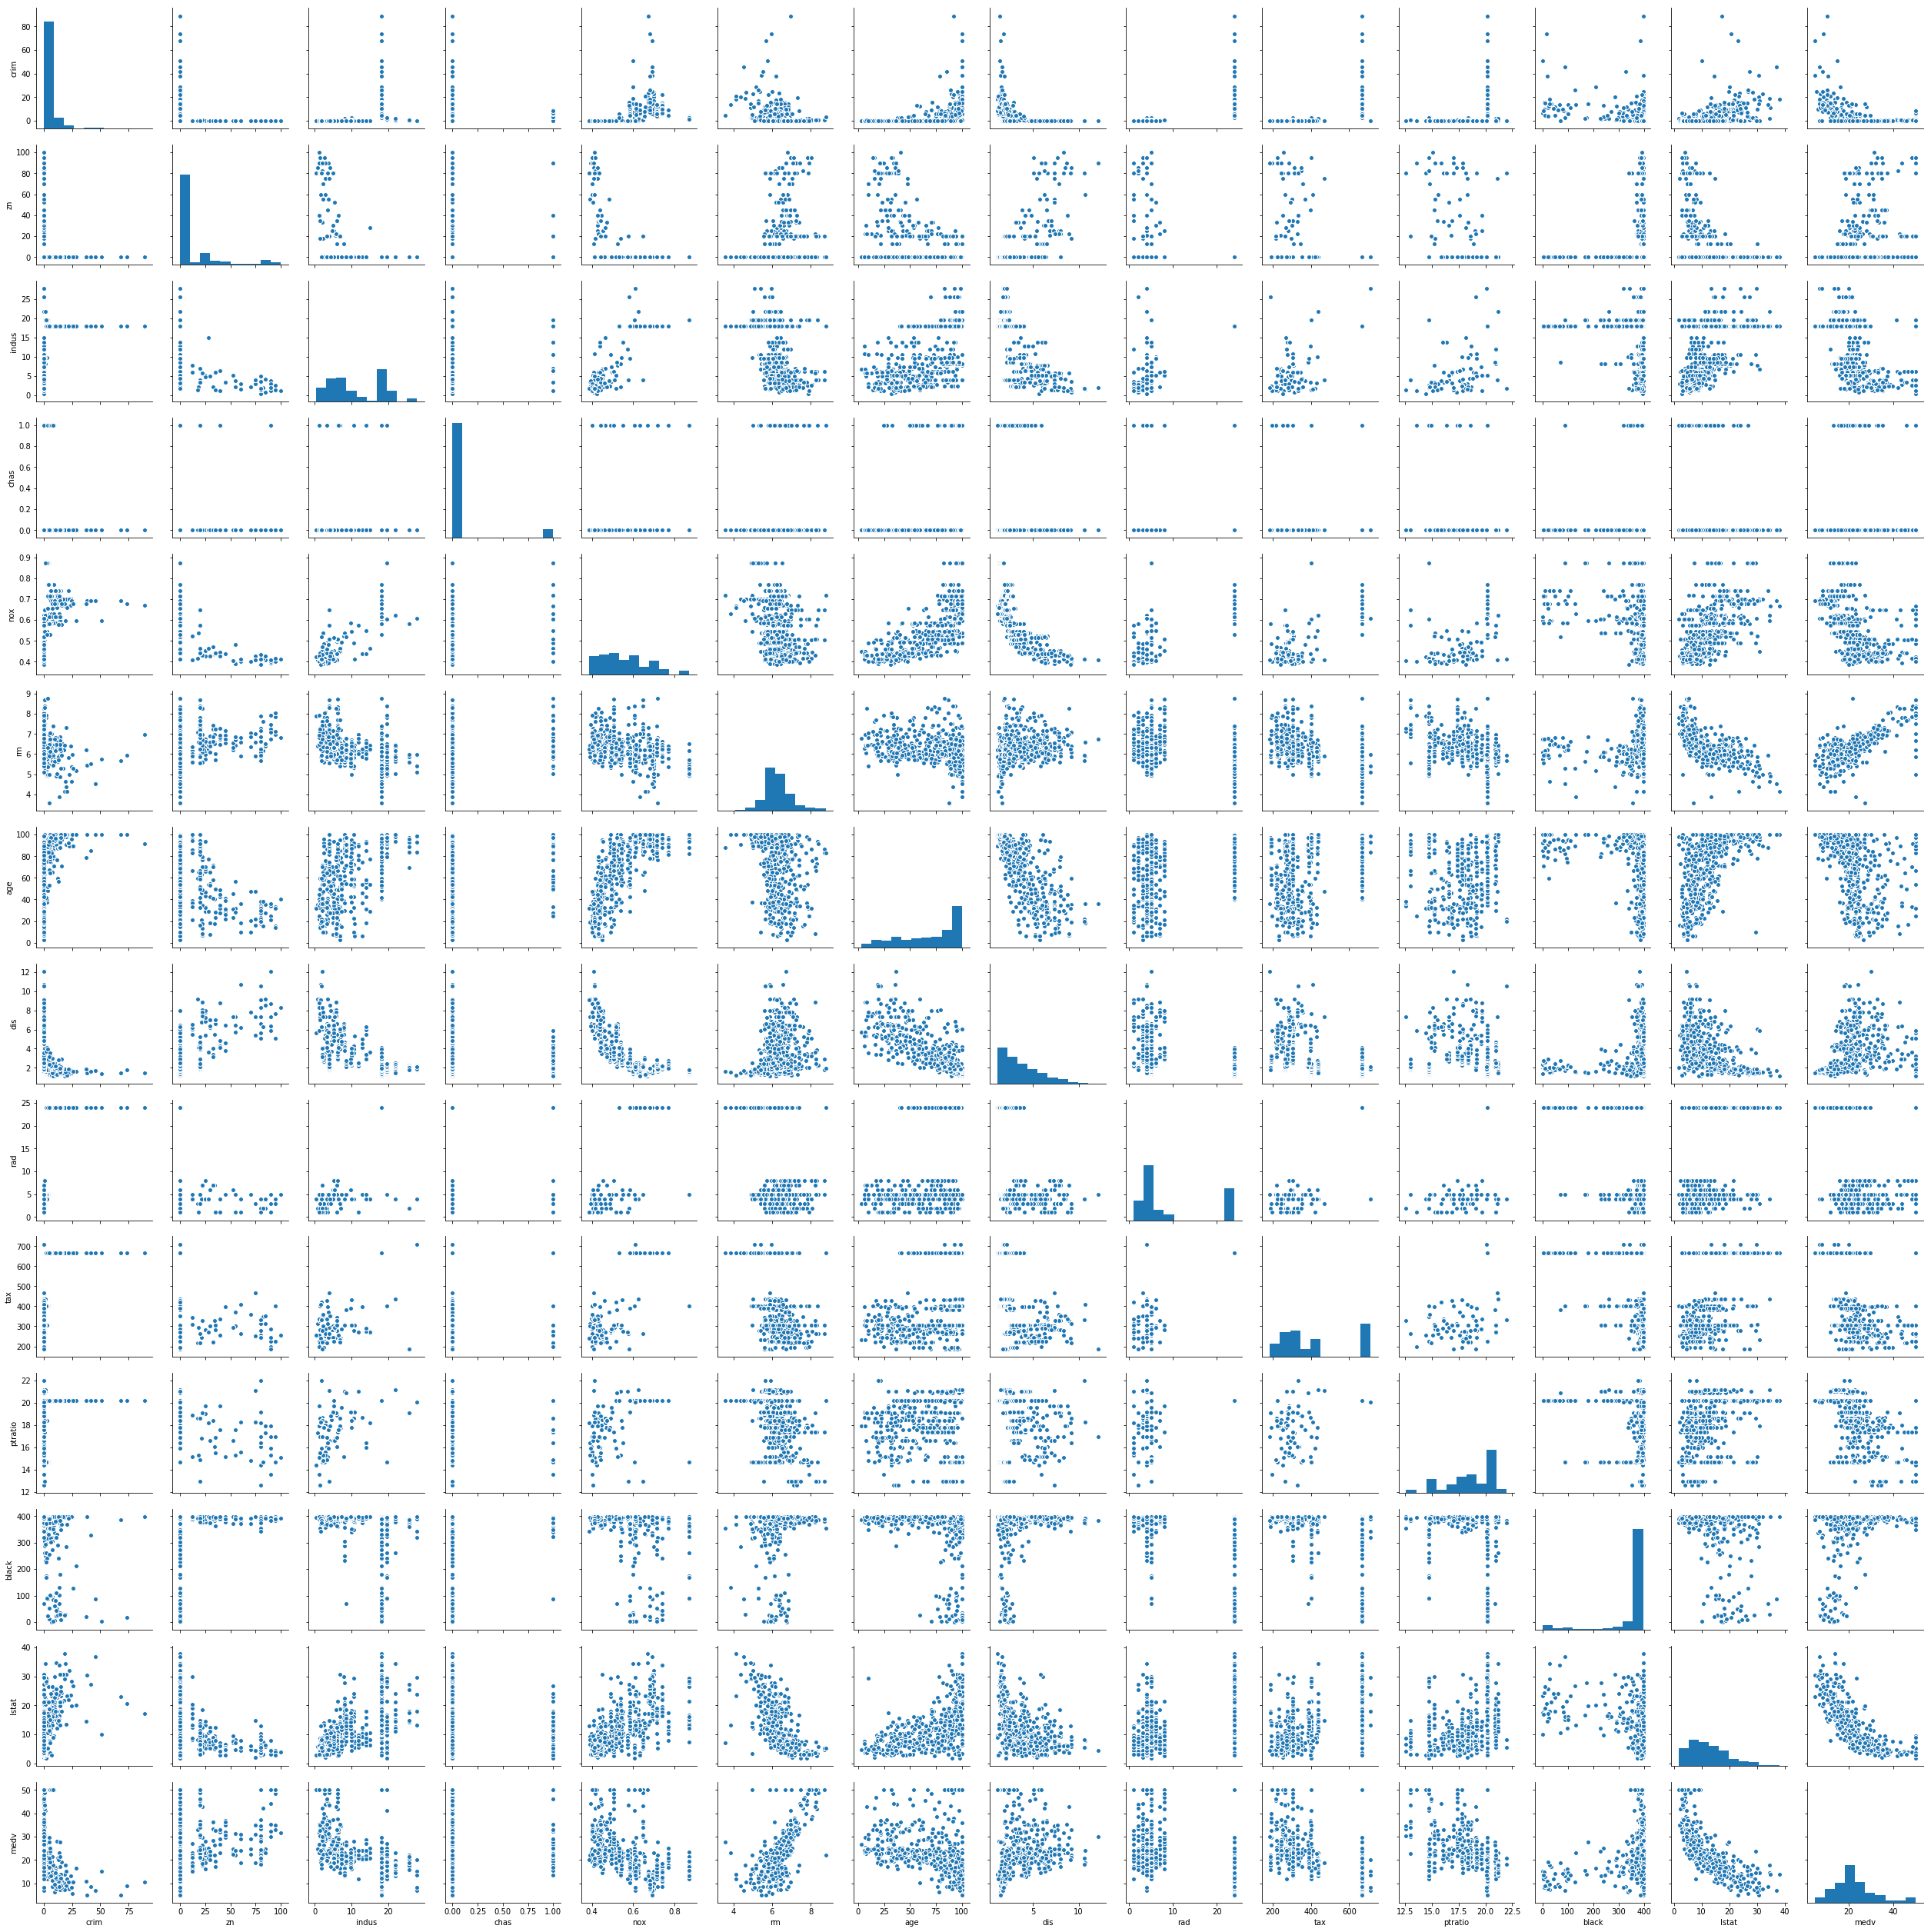

In [6]:
import seaborn as sns
sns.pairplot(dataset) # checking the linearity between the variables

In [7]:
X=dataset.iloc[:,0:13] # extrcting the independent variables
y=dataset.iloc[:,13].values # it is extracting the depdent  varaibles

In [8]:
from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
X= sc.fit_transform(X)
y= y.reshape(-1,1)
y=sc.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)


In [10]:
import warnings
from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=13, input_dim=13)) # input layer
    regressor.add(Dense(units=1)) # output layer
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

C:\Users\Koti\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=36,epochs=10)


In [14]:
results=regressor.fit(X_train,y_train)


Epoch 1/10
354/354 [==============================] - 0s 1ms/step - loss: 0.4542 - mean_absolute_error: 0.5628 - acc: 0.0056
Epoch 2/10
354/354 [==============================] - 0s 126us/step - loss: 0.2811 - mean_absolute_error: 0.4303 - acc: 0.0056
Epoch 3/10
354/354 [==============================] - 0s 65us/step - loss: 0.2351 - mean_absolute_error: 0.3882 - acc: 0.0056
Epoch 4/10
354/354 [==============================] - 0s 83us/step - loss: 0.1965 - mean_absolute_error: 0.3514 - acc: 0.0113
Epoch 5/10
354/354 [==============================] - 0s 50us/step - loss: 0.1615 - mean_absolute_error: 0.3137 - acc: 0.0085
Epoch 6/10
354/354 [==============================] - 0s 72us/step - loss: 0.1399 - mean_absolute_error: 0.2858 - acc: 0.0113
Epoch 7/10
354/354 [==============================] - 0s 63us/step - loss: 0.1225 - mean_absolute_error: 0.2644 - acc: 0.0085
Epoch 8/10
354/354 [==============================] - 0s 44us/step - loss: 0.1081 - mean_absolute_error: 0.2468 - acc:

In [13]:
y_pred= regressor.predict(X_test)

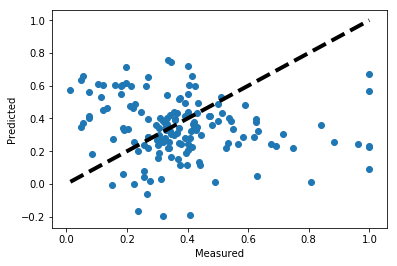

In [15]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()